In [ ]:
#DATA PRE PROCESSING

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# step 1 load data
import pandas as pd
import requests
from io import StringIO

# This is the actual direct link to the 'adult.data' file from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Download the dataset as text
response = requests.get(url)
response.raise_for_status()


# Convert the text data into a pandas DataFrame
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Read the CSV from text (note: it uses ',' as separator and has no header)
data = pd.read_csv(StringIO(response.text), names=column_names, sep=",\s*", engine='python')

# Show the first few rows
print(data.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [4]:
# data detailed info
data.info()

print(data.all)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<bound method DataFrame.all of        age         workclass  fnlwgt   education  education-nu

In [9]:
data.isnull().sum().sum()

np.int64(0)

In [5]:
data.drop(['fnlwgt', 'education-num'], axis=1, inplace=True)


In [12]:
data = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Split features and target
X = data.drop('income', axis=1)
y = data['income']

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns.drop('income')
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [7]:
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


In [8]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [9]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

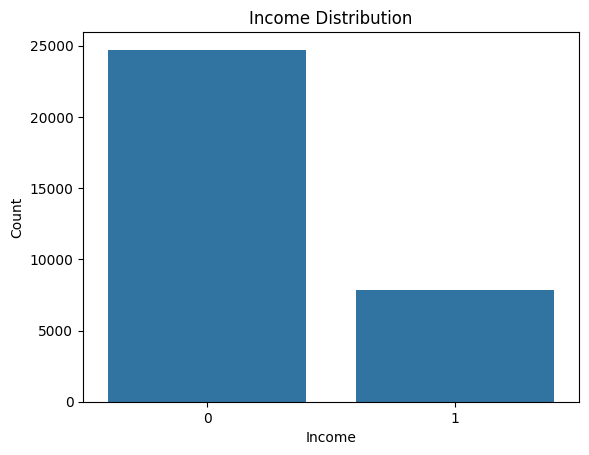

income
0    0.75919
1    0.24081
Name: proportion, dtype: float64


In [10]:
sns.countplot(x='income', data=data)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income Distribution")
plt.show()

print(data['income'].value_counts(normalize=True))

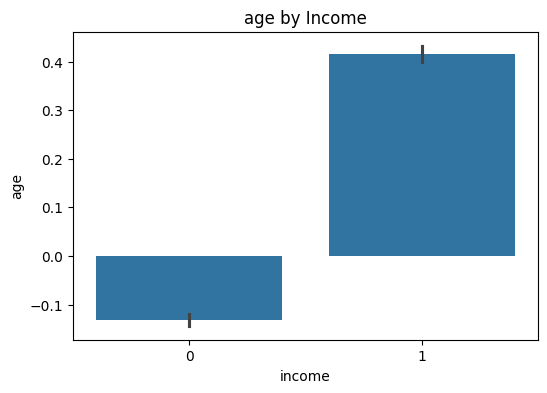

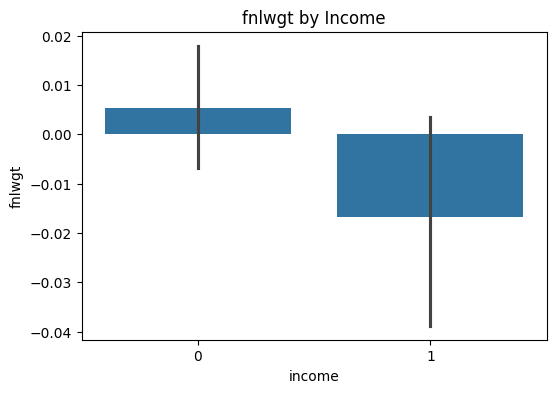

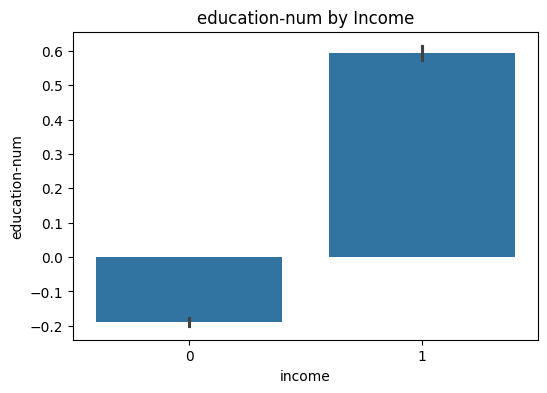

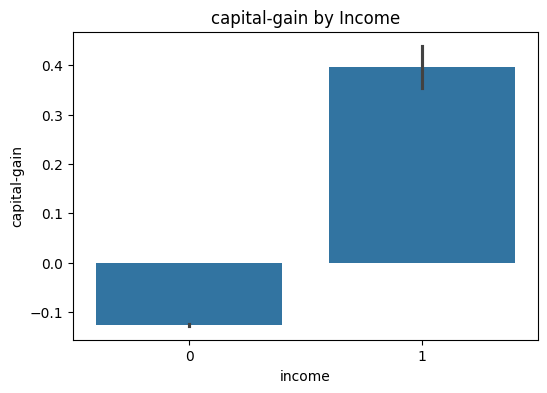

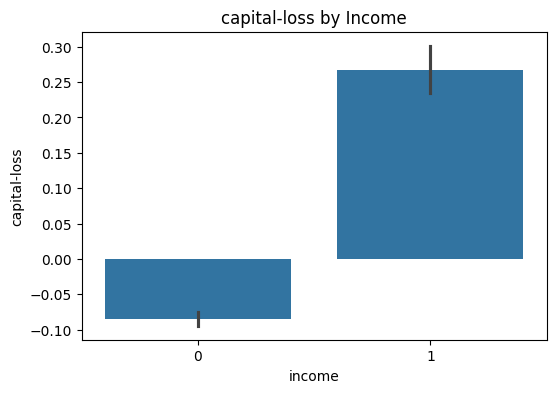

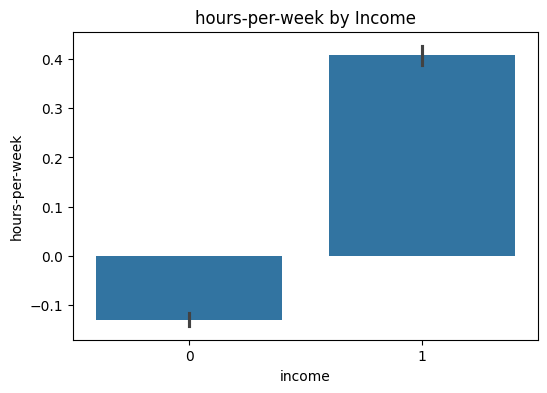

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x="income", y=col, data=data)
    plt.title(f"{col} by Income")
    plt.show()

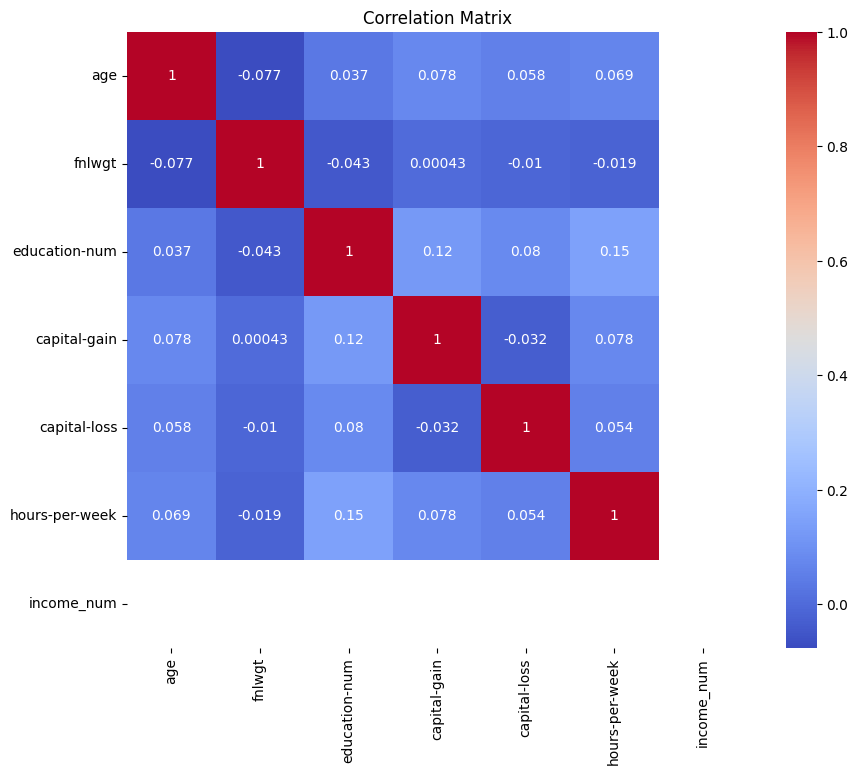

In [ ]:
# Encode income
data['income_num'] = data['income'].map({'>50K': 1, '<=50K': 0})

# Select numeric columns
correlation_matrix = data[numerical_cols + ['income_num']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Step 1: Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('income', axis=1)  # replace 'target_column' with your actual target
y = data ['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Replace '?' with NaN and drop missing values
data = data.replace('?', pd.NA).dropna()

# Encode target column: >50K -> 1, <=50K -> 0
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# One-hot encode categorical columns
X = pd.get_dummies(data.drop('income', axis=1))
y = data['income']


In [24]:
X = pd.get_dummies (data.drop('income', axis=1))

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Use your already preprocessed X and y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True, class_weight='balanced')
}

# Train and evaluate each
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=4))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9448    0.7992    0.8659      4945
           1     0.5738    0.8527    0.6860      1568

    accuracy                         0.8121      6513
   macro avg     0.7593    0.8259    0.7759      6513
weighted avg     0.8555    0.8121    0.8226      6513


=== Random Forest ===
              precision    recall  f1-score   support

           0     0.8864    0.9102    0.8981      4945
           1     0.6906    0.6320    0.6600      1568

    accuracy                         0.8432      6513
   macro avg     0.7885    0.7711    0.7791      6513
weighted avg     0.8392    0.8432    0.8408      6513


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0     0.8827    0.9531    0.9166      4945
           1     0.8024    0.6008    0.6871      1568

    accuracy                         0.8683      6513
   macro avg     0.8426    0.7769    0.8018      

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:18:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0     0.9003    0.9403    0.9199      4945
           1     0.7812    0.6716    0.7222      1568

    accuracy                         0.8756      6513
   macro avg     0.8407    0.8059    0.8211      6513
weighted avg     0.8716    0.8756    0.8723      6513


=== SVM ===
              precision    recall  f1-score   support

           0     0.9540    0.7927    0.8659      4945
           1     0.5736    0.8795    0.6944      1568

    accuracy                         0.8136      6513
   macro avg     0.7638    0.8361    0.7801      6513
weighted avg     0.8624    0.8136    0.8246      6513



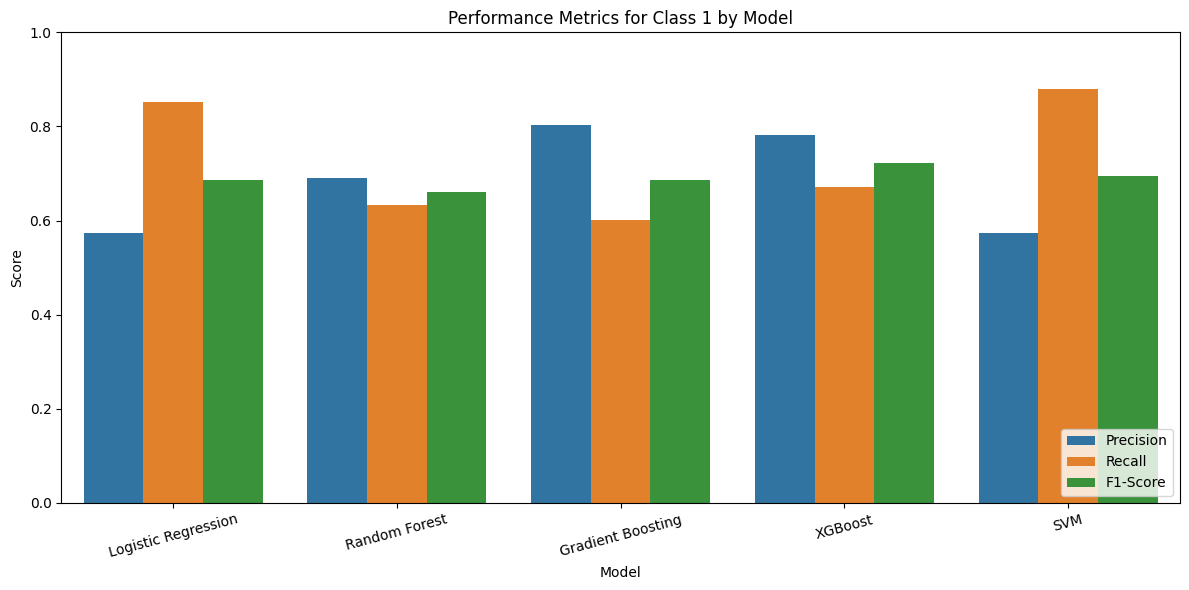

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from your classification reports (Class 1 only)
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM'],
    'Precision': [0.5738, 0.6906, 0.8024, 0.7812, 0.5736],
    'Recall': [0.8527, 0.6320, 0.6008, 0.6716, 0.8795],
    'F1-Score': [0.6860, 0.6600, 0.6871, 0.7222, 0.6944]
}

df = pd.DataFrame(data)

# Melt for easier plotting
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted)
plt.title('Performance Metrics for Class 1 by Model')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-15-801943380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_acc, palette='Blues_d')


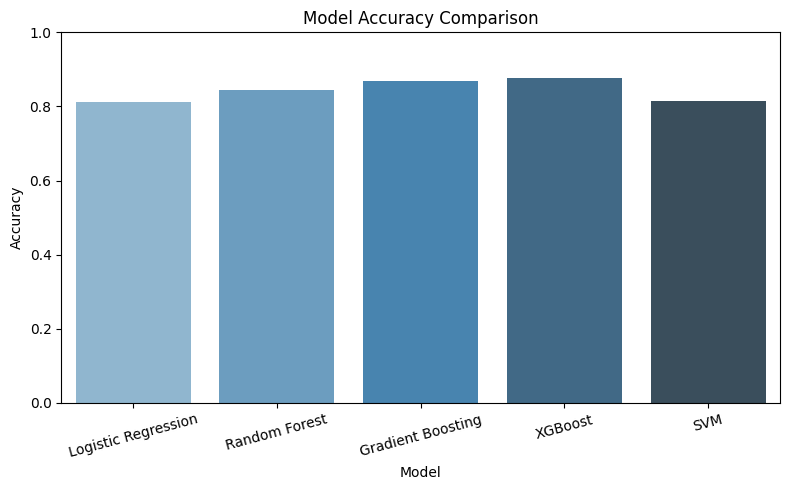

In [15]:
accuracy_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM'],
    'Accuracy': [0.8121, 0.8432, 0.8683, 0.8756, 0.8136]
}

df_acc = pd.DataFrame(accuracy_data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_acc, palette='Blues_d')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Best overall model: ✅ XGBoost

Highest accuracy (87.56%)

Strong f1-score for class 1 (0.7222) — good balance of precision and recall

Suitable if you care about both classes and want good general performance.

Best for catching class 1 cases (high recall):

✅ SVM (Recall 0.8795) or Logistic Regression (0.8527)

Choose if missing a positive case is very costly (e.g., fraud detection, medical diagnosis)

Best precision for class 1: ✅ Gradient Boosting (0.8024)

Useful if false positives are costly